# Naive Bayes Classification

Suppose we are using an API to gather articles from a news website and grabbing phrases from two different types of articles: on **sports** and on **politics**.

Is there a way we can use machine learning to help us label the articles quickly?

#### Example Data

In [1]:
sports = ['the match was close',
          'the coaches agreed on strategy',
          'played in a sold out stadium']

politics = ['world leaders met last week',
            'the election was close',
            'the officials agreed on a compromise']

test_statement = 'world leaders agreed to fund the stadium'

### Bringing Back Bayes

> "Naive Bayes classifiers are linear classifiers that are known for being **simple yet very efficient**. The probabilistic model of naive Bayes classifiers is based on Bayes’ theorem, and the adjective naive comes from the assumption that the features in a dataset are **mutually independent**. In practice, the independence assumption is often violated, but naive Bayes classifiers **still tend to perform very well** under this unrealistic assumption. Especially for small sample sizes, naive Bayes classifiers can outperform the more powerful alternatives."

[Source: Sebasitian Raschka: Naive Bayes and Text Classification](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html) (emphasis is mine)

#### Revisiting the theorem itself:

![bayes theorem](images/bayes_theorem.svg)

#### AKA

![breaking down the function behind naive bayes](images/naive_bayes_icon.png)

####  Another way of looking at it

![further breakdown of the pieces of naive bayes](images/another_one.png)

### So, in the context of our problem:


## $ P(politics | document) = \frac{P(document|politics)P(politics)}{P(document)}$


## We need to calculate each piece in turn...

### How should we calculate $ P(politics) $ ?

This is essentially the distribution of the probability of either type of article. We have three of each type of article in our current set of example documents, therefore, we assume that there is an equal probability of either type.


## $ P(politics) = \frac{\# politics\ documents}{\# all\ documents} $

In [2]:
politics

['world leaders met last week',
 'the election was close',
 'the officials agreed on a compromise']

In [4]:
sports

['the match was close',
 'the coaches agreed on strategy',
 'played in a sold out stadium']

In [3]:
# we can check this, though
# going back to our intro example data...
p_politics = len(politics)/(len(politics) + len(sports))
p_politics

0.5

In [5]:
p_sports = len(sports)/(len(politics) + len(sports))
p_sports

0.5

### How should we calculate $ P(document | politics) $ ?

We need to break the phrases down into individual words - with the hope that these words actually tell us more, since we likely have never seen this exact document before

### $ P(phrase | politics) = \prod_{i=1}^{d} P(word_{i} | politics) $

### $ P(word_{i} | politics) = \frac{\#\ of\ word_{i}\ in\ politics\ docs} {\#\ of\ total\ words\ in\ politics\ docs} $

#### Can you foresee any issues with this?

- if you see a word in your test set that isn't in your train set, you get ZEROS which makes the math not work properly


#### Enter: Laplace Smoothing

### $ P(word_{i} | politics) = \frac{\#\ of\ word_{i}\ in\ politics\ docs + \alpha} {\#\ of\ total\ words\ in\ politics\ docs + \alpha d} $

This correction process is called Laplace Smoothing:

- d : number of features (in this instance total number of vocabulary words)
- $\alpha$ can be any number greater than 0 (it is usually 1)

### How should we calculate $ P(document) $ ?

- well... we don't have to, because the P(document) doesn't change whether we're looking at sports or politics, we're just going to compare the numerator of these to see which is bigger between sports or politics!


### So why is this 'naive' ?

> "Naive Bayes (NB) is ‘naive’ because it makes the assumption that features of a measurement are independent of each other. This is naive because it is (almost) never true."

[Source - 'What's So Naive About Naive Bayes?', a Towards Data Science blog post all about this](https://towardsdatascience.com/whats-so-naive-about-naive-bayes-58166a6a9eba)

### Now let's calculate this...

In [6]:
print(sports)
print(politics)

['the match was close', 'the coaches agreed on strategy', 'played in a sold out stadium']
['world leaders met last week', 'the election was close', 'the officials agreed on a compromise']


| word       | frequency in politics | frequency in sports |
| ---------- | --------------------- | ------------------- |
| the        |  2                    | 2                   |
| match      |  0                    | 1                   |
| was        |  1                    | 1                   |
| close      |  1                    | 1                   |
| coaches    |  0                    | 1                   |
| agreed     |  1                    | 1                   |
| on         |  1                    | 1                   |
| strategy   |  0                    | 1                   |
| played     |  0                    | 1                   |
| in         |  0                    | 1                   |
| a          |  1                    | 1                   |
| sold       |  0                    | 1                   |
| out        |  0                    | 1                   |
| stadium    |  0                    | 1                   |
| world      |  1                    | 0                   |
| leaders    |  1                    | 0                   |
| met        |  1                    | 0                   |
| last       |  1                    | 0                   |
| week       |  1                    | 0                   |
| election   |  1                    | 0                   |
| officials  |  1                    | 0                   |
| compromise |  1                    | 0                   |

> Test sentence: 'world leaders agreed to fund the stadium'

| word    | $ P( word | politics) $                | $ P( word | sports) $                  |
| ------- | -------------------------------------- | -------------------------------------- |
| world   | $\frac{1 + 1}{15 + 30} = \frac{2}{45}$ | $\frac{0 + 1}{15 + 30} = \frac{1}{45}$ |
| leaders | $\frac{1 + 1}{15 + 30} = \frac{2}{45}$ | $\frac{0 + 1}{15 + 30} = \frac{1}{45}$ |
| agreed  | $\frac{1 + 1}{15 + 30} = \frac{2}{45}$ | $\frac{1 + 1}{15 + 30} = \frac{2}{45}$ |
| to      | $\frac{0 + 1}{15 + 30} = \frac{1}{45}$ | $\frac{0 + 1}{15 + 30} = \frac{1}{45}$ |
| fund    | $\frac{0 + 1}{15 + 30} = \frac{1}{45}$ | $\frac{0 + 1}{15 + 30} = \frac{1}{45}$ |
| the     | $\frac{2 + 1}{15 + 30} = \frac{3}{45}$ | $\frac{2 + 1}{15 + 30} = \frac{3}{45}$ |
| stadium | $\frac{0 + 1}{15 + 30} = \frac{1}{45}$ | $\frac{1 + 1}{15 + 30} = \frac{2}{45}$ |

I dunno about you... but I'm already exhausted trying to do this from scrach, and that's just a single sentence. Let's move into Python.

In [7]:
# Initial imports

import numpy as np
np.random.seed(123)
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

Remember, we want

$ P(document|sports) * P(sports) $ **vs.** $ P(document|politics) * P(politics) $

We already calculated $P(sports)$ and $P(politics)$ above - they're both 50% since we have an equal number of documents in each. But the $P(document | label)$ for the two labels is going to require breaking out each word to find the likelihood that each word is in each category (plus Laplacian smoothing)

In [8]:
def vocab_maker(category):
    """
    returns the vocabulary for a given type of article
    """
    vocab_category = set()
    for art in category:
        words = art.split()
        for word in words:
            vocab_category.add(word)
    return vocab_category
        
voc_sports = vocab_maker(sports)
voc_pol = vocab_maker(politics)
total_vocabulary = voc_sports.union(voc_pol)

In [9]:
voc_sports

{'a',
 'agreed',
 'close',
 'coaches',
 'in',
 'match',
 'on',
 'out',
 'played',
 'sold',
 'stadium',
 'strategy',
 'the',
 'was'}

In [10]:
voc_pol

{'a',
 'agreed',
 'close',
 'compromise',
 'election',
 'last',
 'leaders',
 'met',
 'officials',
 'on',
 'the',
 'was',
 'week',
 'world'}

In [11]:
total_vocabulary

{'a',
 'agreed',
 'close',
 'coaches',
 'compromise',
 'election',
 'in',
 'last',
 'leaders',
 'match',
 'met',
 'officials',
 'on',
 'out',
 'played',
 'sold',
 'stadium',
 'strategy',
 'the',
 'was',
 'week',
 'world'}

In [12]:
total_vocab_count = len(total_vocabulary) # useful for laplacian smoothing
total_sports_count = len(voc_sports)
total_politics_count = len(voc_pol)

In [13]:
def find_number_words_in_category(phrase, category):
    '''
    returns number of words in the phrase previously found in the category
    
    inputs:
    phrase - string, test phrase to classify
    category - list, all training phrases associated with that category
    
    output:
    word_count - default dictionary, with each word in the phrase as a key 
                 with a value of the number of times the words have 
                 appeared in the category in the train set
    '''
    # gets each word out - statement is a list object now
    statement = phrase.split()
    
    # creating one big string from the provided category list
    str_category=' '.join(category)
    # splitting now so it's a single list of the words found in the category
    cat_word_list = str_category.split()
    # default dict allows us to create new keys easily
    word_count = defaultdict(int) 
    
    for word in statement:
        for cat_word in cat_word_list:
            if word == cat_word:
                word_count[word] +=1
            else:
                word_count[word] # here's the part that works because default dict
    return word_count

In [14]:
test_sports_word_count = find_number_words_in_category(test_statement,sports)
test_sports_word_count

defaultdict(<class 'int'>, {})


defaultdict(int,
            {'world': 0,
             'leaders': 0,
             'agreed': 1,
             'to': 0,
             'fund': 0,
             'the': 2,
             'stadium': 1})

In [15]:
test_politic_word_count = find_number_words_in_category(test_statement,politics)
test_politic_word_count

defaultdict(<class 'int'>, {})


defaultdict(int,
            {'world': 1,
             'leaders': 1,
             'agreed': 1,
             'to': 0,
             'fund': 0,
             'the': 2,
             'stadium': 0})

### $ P(politics | article) = P(politics) x \prod_{i=1}^{d} P(word_{i} | politics) $

In [16]:
def find_likelihood(category_count, test_category_count, alpha):
    
    num = np.product(np.array(list(test_category_count.values())) + alpha)
    denom = (category_count + total_vocab_count*alpha)**(len(test_category_count))
    
    return num/denom

In [17]:
likelihood_sports = find_likelihood(total_sports_count,test_sports_word_count,1)

In [18]:
likelihood_politics = find_likelihood(total_politics_count,test_politic_word_count,1)

In [19]:
# yeah... the probabilities out don't mean anything, just worry about which is bigger
print(likelihood_sports)
print(likelihood_politics)

1.5313121933259447e-10
3.0626243866518893e-10


#### Determing the winner of our model:

![](images/solvingforyhat.png)

In [20]:
# p(politics|article) > p(music|article)
(likelihood_politics * p_politics) > (likelihood_sports * p_sports)

True

### Pros:

* It is an efficient way to predict class of test data set. It perform well in multi class prediction
* When assumption of independence holds, a Naive Bayes classifier performs requires less training data and can perform better than models like logistic regression.
* Performs better with categorical inputs. For numerical input, one has to assume a normal distribution.

### Cons:

* Naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously
* We are assuming of independent predictors, but in real life, it is almost impossible that we get a set of predictors which are completely independent (amazingly, still works a lot of the time though!)

... but let's be real, we don't need to use hand-written functions for this

### Using Naive Bayes in sklearn

In [21]:
# more imports
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix

from sklearn.naive_bayes import GaussianNB

In [22]:
# fetching our data
news_train = fetch_20newsgroups(subset='train', 
                                categories = ['rec.sport.baseball', 
                                              'talk.politics.misc'])
news_test = fetch_20newsgroups(subset='test', 
                               categories = ['rec.sport.baseball', 
                                              'talk.politics.misc'])

In [26]:
# collecting data in dataframe
df_train = pd.DataFrame()
df_train['Data'] = news_train.data
df_train['Target'] = news_train.target

df_test = pd.DataFrame()
df_test['Data'] = news_test.data
df_test['Target'] = news_test.target

In [27]:
# grabbing our target classes so we know which is which
target_classes = dict(enumerate(news_test.target_names))
target_classes

{0: 'rec.sport.baseball', 1: 'talk.politics.misc'}

In [28]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    1062 non-null   object
 1   Target  1062 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.7+ KB


,Data,Target
0,From: pcaster@mizar.usc.edu (Dodger)\nSubject:...,0
1,From: lbr@holos0.uucp (Len Reed)\nSubject: Re:...,0
2,From: scott@asd.com (Scott Barman)\nSubject: R...,0
3,Organization: City University of New York\nFro...,1
4,From: dos@major.panix.com (Dave O'Shea)\nSubje...,1


In [29]:
df_train['Data'][950]

'From: ipser@solomon.technet.sg (Ed Ipser)\nSubject: Government-Mandated Energy Conservation is Unnecessary and Wastful, Study Finds\nNntp-Posting-Host: solomon.technet.sg\nLines: 94\n\n\n\n  Government-Mandated Energy Conservation is Unnecessary and Wastful, Study Finds\n\n  Washington, DC -- The energy tax and subsidized energy-efficiency\n  measures supported by President Clinton and Energy Secretary Hazel\n  O\'Leary are based on faulty assumptions, a new study from the Cato\n  Institute points out.\n\n    According to Jerry Taylor, Cato\'s director of natural resource studies,\n  we are not running out of sources of energy. The world now has almost 10\n  times the proven oil reserves it had in 1950 and twice the reserves of\n  1970. Proven reserves of coal and natural gas have increased just as\n  dramatically.\n\n    When standards of living, population densities, and industrial\n  structures are controlled for, the United States is no less energy\n  efficient than Japan and more

In [30]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    707 non-null    object
 1   Target  707 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.2+ KB


,Data,Target
0,From: jaffray@dent.uchicago.edu (Alan Jaffray)...,1
1,From: as010b@uhura.cc.rochester.edu (Tree of S...,1
2,From: reed5575@iscsvax.uni.edu\nSubject: Re: B...,0
3,From: sys1@exnet.co.uk (Xavier Gallagher)\nSub...,1
4,From: carroll@hercules.cis.udel.edu (Mark C. C...,1


In [32]:
print(f'Train Target Ratio: {df_train["Target"].mean():.4f}')
print(f'Test Target Ratio: {df_test["Target"].mean():.4f}')
# roughly equivalent breakdowns between classes in train and test set

Train Target Ratio: 0.4379
Test Target Ratio: 0.4385


#### Need to turn our text data into numbers...

In [33]:
# Using a Count Vectorizer
# Goes through each doc and counts how many of each word
vectorizer = CountVectorizer()
# Fitting and transforming our train data
X_train = vectorizer.fit_transform(df_train['Data']).toarray() # to array is just for the model later
# Just transforming our test data
X_test = vectorizer.transform(df_test['Data']).toarray()

In [34]:
# What does this look like?
X_train_vectorized = pd.DataFrame(X_train, columns=vectorizer.get_feature_names())
X_train_vectorized.head()

,00,000,000007,000k,000th,0010,001116,001211,001338,002,...,zone,zoo,zooid,zorba,zumwalt,zupcic,zz,zzzzzz,zzzzzzt,ñaustin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Let's explore a single example of our new vectorized X

In [38]:
# Before
df_train.iloc[[950]]

,Data,Target
950,From: ipser@solomon.technet.sg (Ed Ipser)\nSub...,1


In [39]:
# Full text before
df_train['Data'][950]

'From: ipser@solomon.technet.sg (Ed Ipser)\nSubject: Government-Mandated Energy Conservation is Unnecessary and Wastful, Study Finds\nNntp-Posting-Host: solomon.technet.sg\nLines: 94\n\n\n\n  Government-Mandated Energy Conservation is Unnecessary and Wastful, Study Finds\n\n  Washington, DC -- The energy tax and subsidized energy-efficiency\n  measures supported by President Clinton and Energy Secretary Hazel\n  O\'Leary are based on faulty assumptions, a new study from the Cato\n  Institute points out.\n\n    According to Jerry Taylor, Cato\'s director of natural resource studies,\n  we are not running out of sources of energy. The world now has almost 10\n  times the proven oil reserves it had in 1950 and twice the reserves of\n  1970. Proven reserves of coal and natural gas have increased just as\n  dramatically.\n\n    When standards of living, population densities, and industrial\n  structures are controlled for, the United States is no less energy\n  efficient than Japan and more

In [40]:
# After
X_train_vectorized.iloc[950].sort_values(ascending=False).head(20)

the             42
of              27
and             19
energy          18
in              12
is              11
institute       11
cato            11
are             10
to               9
that             8
government       8
from             7
policy           7
conservation     6
dc               4
oil              4
not              4
on               4
washington       4
Name: 950, dtype: int64

#### Now time to model!

In [41]:
# Setting our y values
y_train = df_train['Target']
y_test = df_test['Target']

In [46]:
# Instantiating our model - just using default values
model = GaussianNB()
# Fitting our model
model.fit(X_train,y_train)
# Making predictions on our test set
y_preds = model.predict(X_test)
y_preds_train = model.predict(X_train)


# How'd we do?
print(f'Naive Bayes Train Accuracy: {accuracy_score(y_train, y_preds_train):.4f}')
print(f'Naive Bayes Train F1-Score: {f1_score(y_train, y_preds_train):.4f}')
print('-----')
print(f'Naive Bayes Test Accuracy: {accuracy_score(y_test, y_preds):.4f}')
print(f'Naive Bayes Test F1-Score: {f1_score(y_test, y_preds):.4f}')

Naive Bayes Train Accuracy: 1.0000
Naive Bayes Train F1-Score: 1.0000
-----
Naive Bayes Test Accuracy: 0.9576
Naive Bayes Test F1-Score: 0.9524


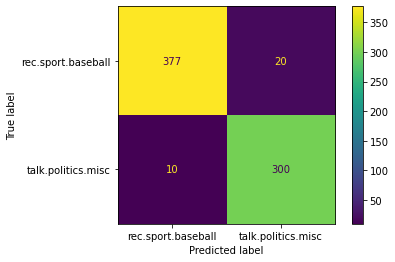

In [43]:
plot_confusion_matrix(model, X_test, y_test, display_labels = target_classes.values())
plt.show()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Train Accuracy: 1.0000
Logistic Regression Train F1-Score: 1.0000
-----
Logistic Regression Test Accuracy: 0.9406
Logistic Regression Test F1-Score: 0.9309


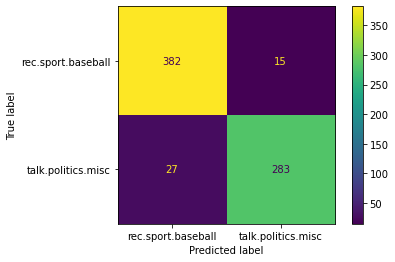

In [45]:
# for comparison...

from sklearn.linear_model import LogisticRegression

# Instantiating our model - just using default values
logreg = LogisticRegression(random_state=123)
# Fitting our model
logreg.fit(X_train,y_train)
# Making predictions on our test set
y_preds_lr = logreg.predict(X_test)
y_preds_train = logreg.predict(X_train)


# How'd we do?
print(f'Logistic Regression Train Accuracy: {accuracy_score(y_train, y_preds_train):.4f}')
print(f'Logistic Regression Train F1-Score: {f1_score(y_train, y_preds_train):.4f}')
print('-----')
print(f'Logistic Regression Test Accuracy: {accuracy_score(y_test, y_preds_lr):.4f}')
print(f'Logistic Regression Test F1-Score: {f1_score(y_test, y_preds_lr):.4f}')

plot_confusion_matrix(logreg, X_test, y_test, display_labels = target_classes.values())
plt.show()

Untuned Random Forest Test Accuracy: 0.9335
Untuned Random Forest Test F1-Score: 0.9191


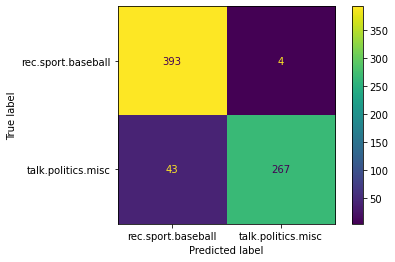

In [47]:
# another comparison...

from sklearn.ensemble import RandomForestClassifier

# Instantiating our model - just using default values
rf = RandomForestClassifier(random_state=123)
# Fitting our model
rf.fit(X_train,y_train)
# Making predictions on our test set
y_preds_rf = rf.predict(X_test)

# How'd we do?
print(f'Untuned Random Forest Test Accuracy: {accuracy_score(y_test, y_preds_rf):.4f}')
print(f'Untuned Random Forest Test F1-Score: {f1_score(y_test, y_preds_rf):.4f}')

plot_confusion_matrix(rf, X_test, y_test, display_labels = target_classes.values())
plt.show()